# Spectral Construction

In [7]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## 

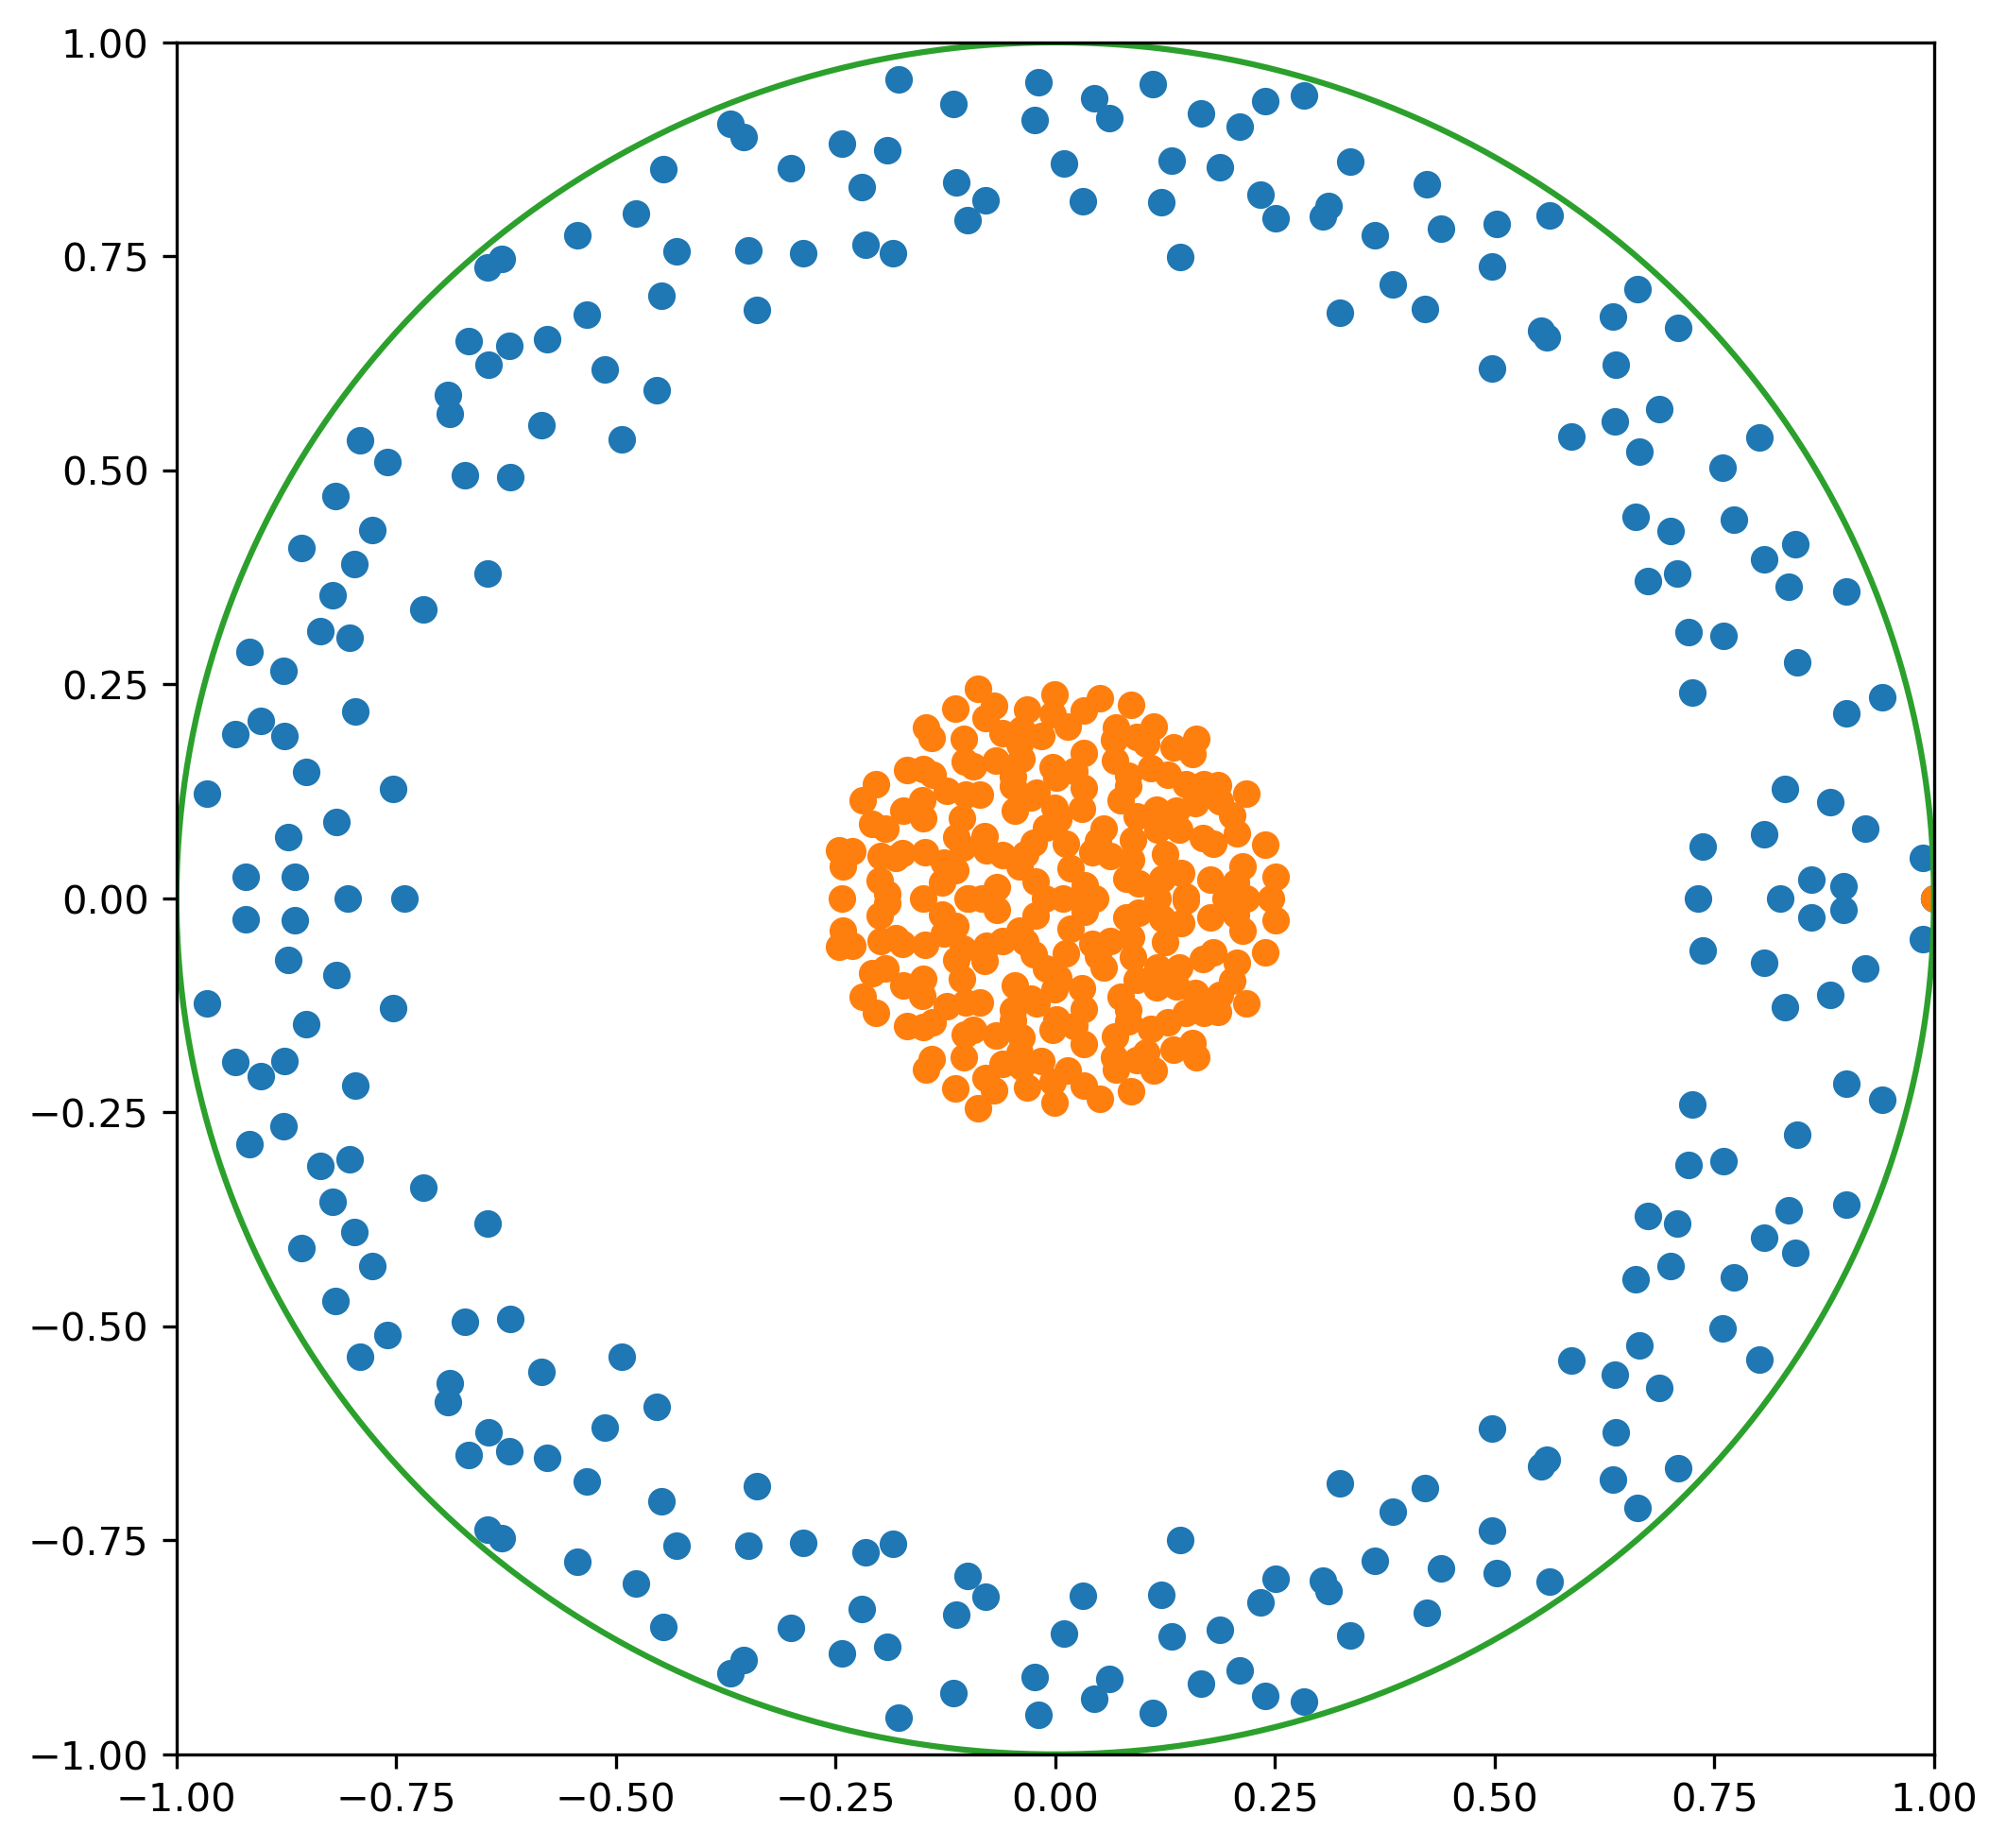

In [8]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)
                      
kraus_target = DilutedKrausMap(U = generate_haar_random(d),
                               c = 0.5,
                               kraus_part = KrausMap(d=d, rank=4),
                               )

kraus_model = KrausMap(d = d, 
                       rank = d,
                      )


spectrum_target = channel_spectrum(kraus_target)
spectrum_target = normalize_spectrum(spectrum_target)
spectrum_model = channel_spectrum(kraus_model)
t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [9]:
loss_function = SpectrumDistance(sigma=0.1, k = 10000)

model = ModelQuantumMap(
                        channel = kraus_model,
                        loss_function = loss_function,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = loss_function, 
                                        verbose=True,)
                        )

In [41]:
model.train(inputs = [spectrum_target],
            targets = [],
            num_iter = 1000,
            N = 0,
           )

  0%|          | 0/1000 [00:00<?, ?it/s]

0.0015528531786602323 None
0.001341336923825584 None
0.0012762509333121633 None
0.0011891364804405974 None
0.001113300117447119 None
0.0010705325158136617 None
0.0010569906247906366 None


KeyboardInterrupt: 

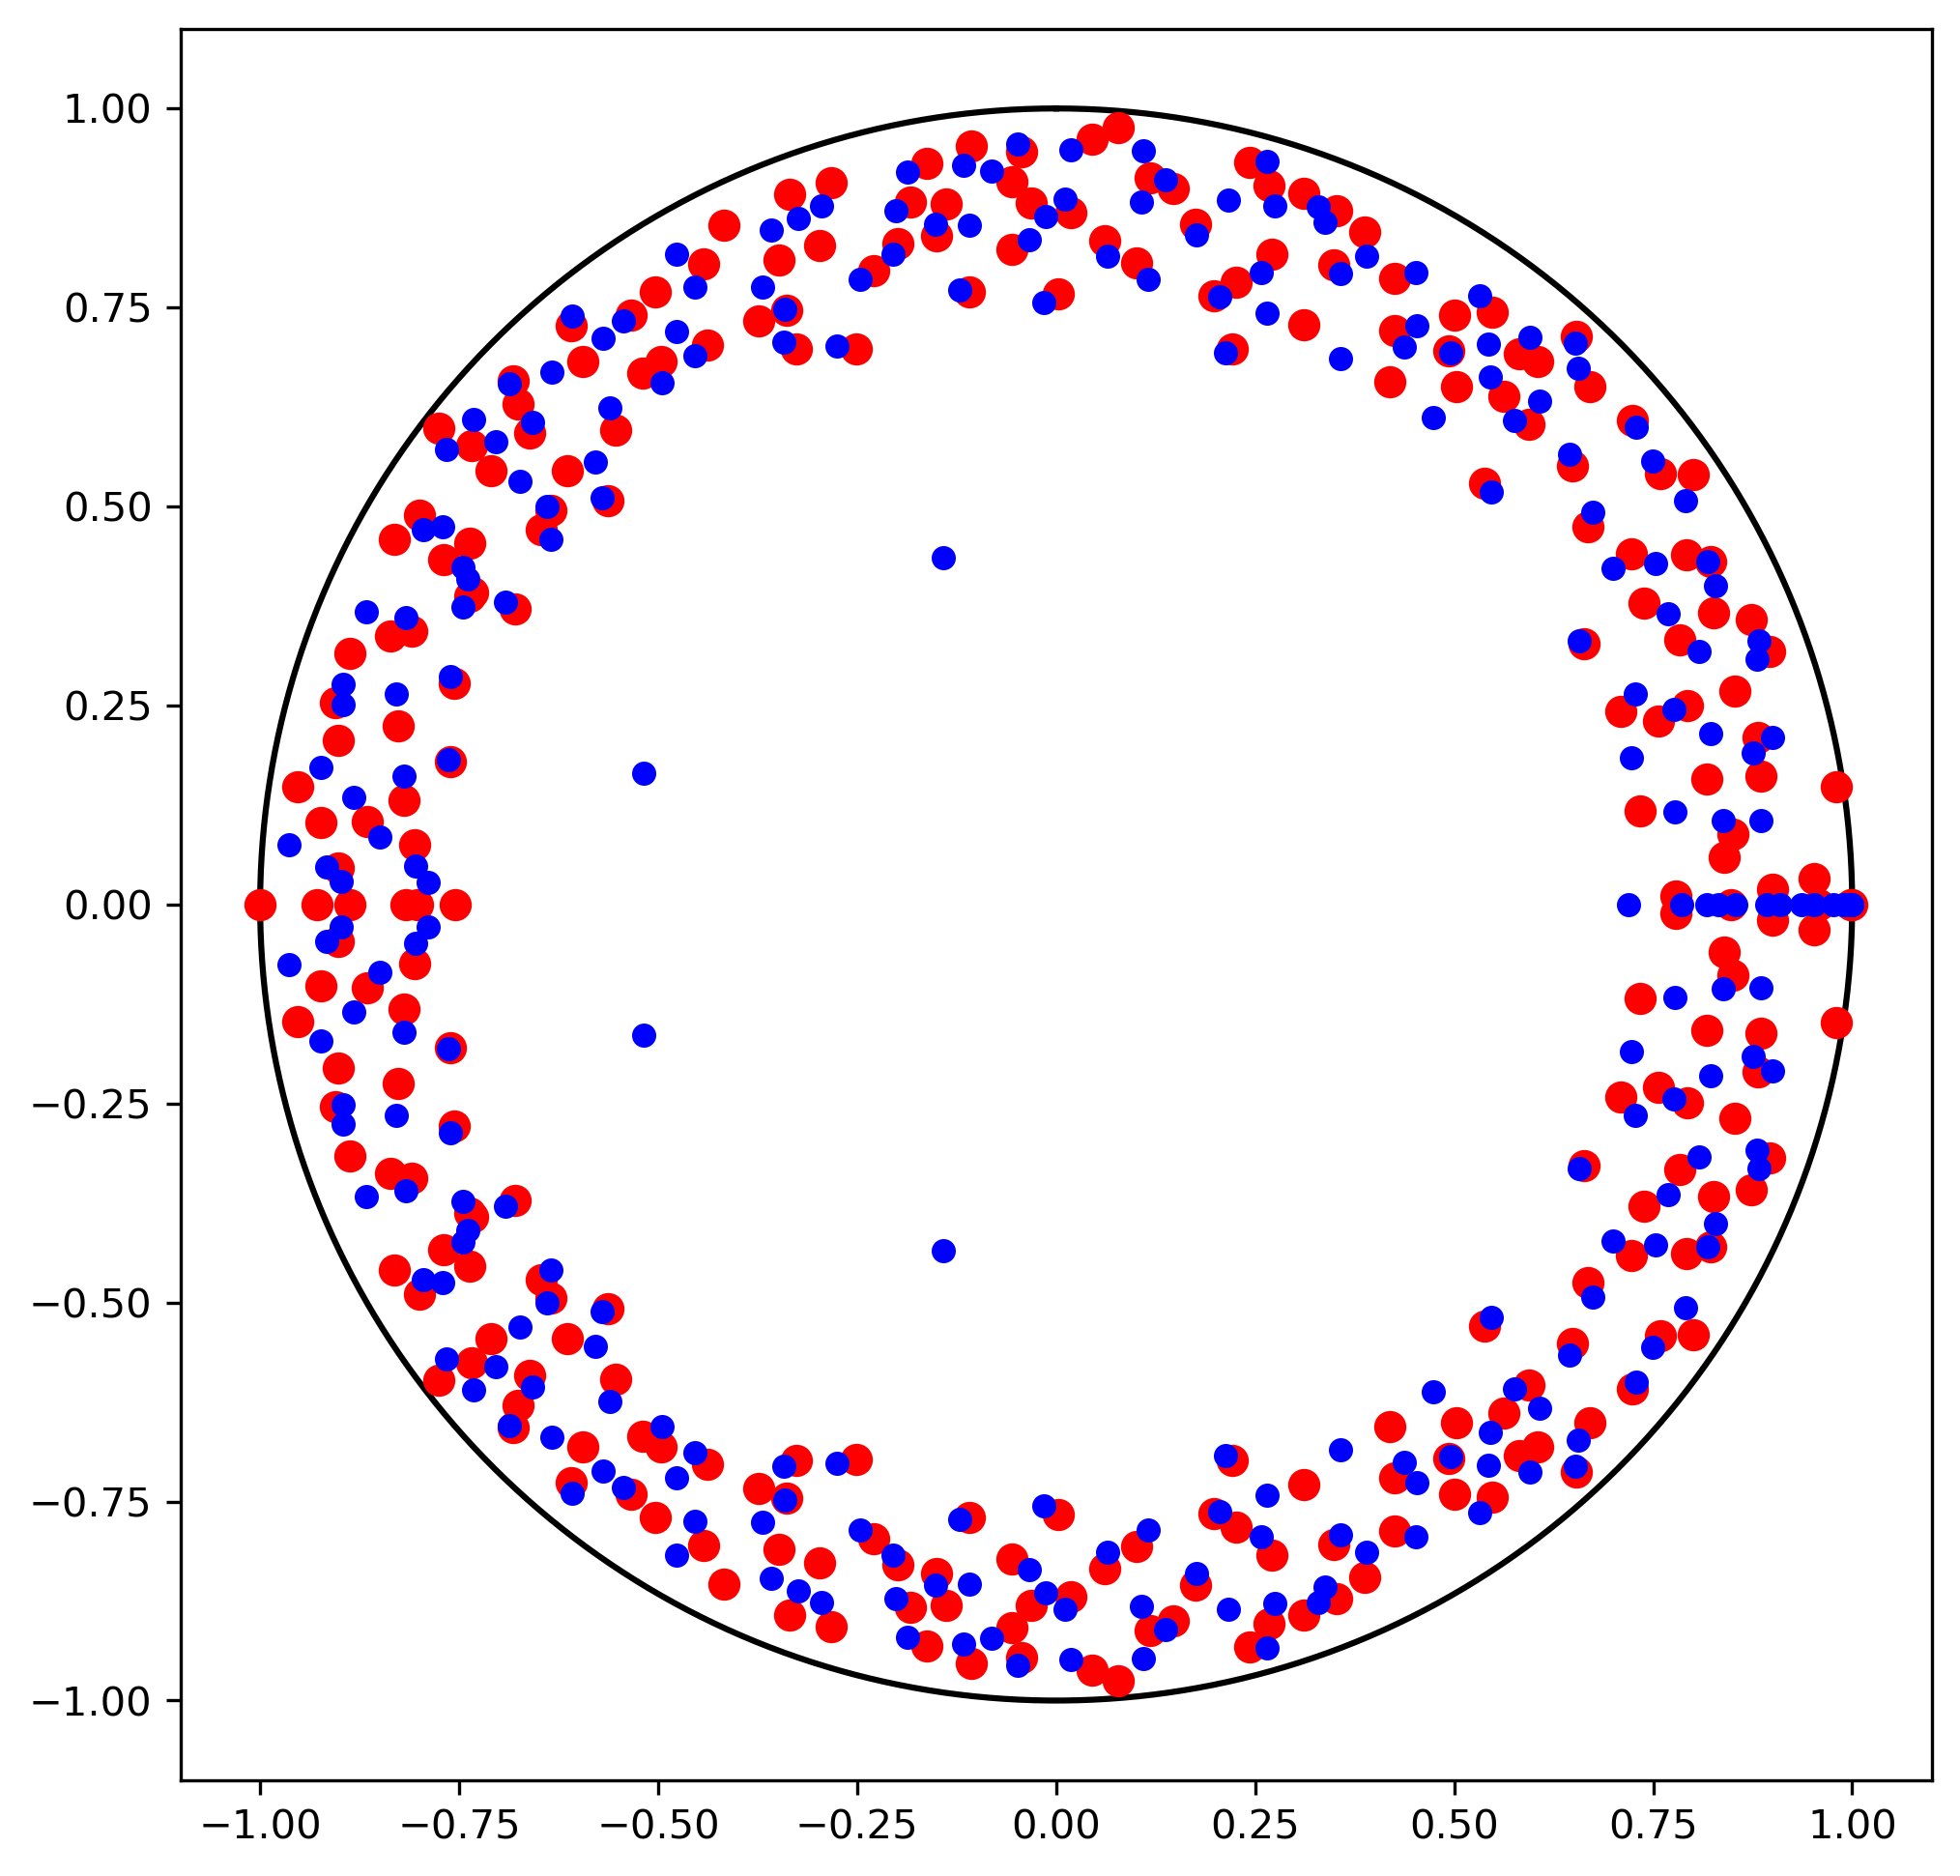

In [42]:
spectrum_model = channel_spectrum(kraus_model)
    
fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k-")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

0.4496661950555852 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.3689718145642182 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.32239343360828376 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.2773097318004688 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.23380059511572732 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.1964578138829356 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.16851657251198715 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.14772038590144446 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.12693860017731257 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.09497134668520989 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0601228658443074 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.03926723116232711 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.027790758894398485 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.01879770646939697 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.014529918770241741 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.011674172189959427 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.010336739345586876 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.008641891107513844 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.006919869920111579 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.006010699064808264 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.005497846376029687 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.005200961863638637 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.004940452229120956 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.004717426784510738 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.004558263910974546 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.004428816310780959 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.00429706625499799 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.004101898098317985 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.003924410180357718 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.003779523524105155 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0035615821526283273 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0034450841325842987 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.003367188194273542 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.003307803953702358 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.003252908384625726 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0031878547900016513 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0031157507253167446 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.00299116743381362 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0027083053566649973 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0022708285889778135 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0020152821428657056 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0017782830171023667 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0016644742282379762 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.001585664583783418 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0015285021573471155 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0014837438324179567 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.001445930669860221 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0014118791962687838 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0013758597913437892 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0013151971120461958 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0012539346905116183 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0012201175642485296 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0011939843004447129 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.001175799376505124 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0011596014994112239 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0011456421595218216 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0011395651033757268 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.001126662036867565 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.001109837231489108 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010971726228162781 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010867094387489729 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010768712318723755 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010641728722079052 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.001050215791341319 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010421607354408544 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010351854853023201 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.00102379294428602 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010114014475878785 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010041325988655106 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009938846666118148 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009914626698493897 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009768429713617396 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009745591784882726 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009746546600397782 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000961861492977327 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009477134516307495 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009271719845287199 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009123034841196642 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008846935221343069 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008855832687740331 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000861013881469419 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008479942219450573 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008356504003534868 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008555621040084102 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000826177628505842 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008420918573410902 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008506488453964428 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008115667300668677 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007980734758766539 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007940796985787466 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008220625414654889 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008107829261397512 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008199875885579119 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008001669012854262 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007804378595266601 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007905034414865814 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008030567457133417 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008297366411593454 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008005014163435728 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007784995111434143 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007877555015208607 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000803873673724087 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000768049641940001 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007913283956875045 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000759741436332749 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007544547256927159 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007513428955426976 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007494419513130249 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007551896838976502 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000755544118969699 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000757813434177218 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007640951692581277 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008538619549027723 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008045165237865332 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007658294354571452 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007525373075214781 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007526731243148316 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007519367428622734 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007599314711009136 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009708473399258968 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007774976534331984 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007588466507490524 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000760270501876277 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007598614597573786 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000770837524920312 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008792080351548784 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007989673330954655 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007696378616355581 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007651805569028891 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007628857056174165 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007626349895079737 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007627786233034076 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007635810191971432 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007713384351742264 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007638914983331968 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009470237477158319 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008013434897847435 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007786166425780075 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007737641654768368 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007765161019019015 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007784363488749571 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007741622749518687 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007845202351891845 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007850598245261742 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0010001308004404519 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007964192128716782 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007914760089752712 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007834999770001613 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007889376202578208 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007960249958311738 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008080829142271817 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009339861037040778 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008213885708963087 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007987446991253588 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0007962017727750903 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008050795967966123 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008077705110400291 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008137715807768897 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008038653241225907 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008037332179926734 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008590301584900581 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008294808639522505 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008161684402006042 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008023230714961707 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008096240121158726 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008308320498758154 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008543062088634049 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008565517434634198 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008234188759107808 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008120162714223209 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008130900068799921 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008217973852523083 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008179000510447551 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008357941365665159 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008236913426812043 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009035297781618337 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008745469946017867 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008270181783398486 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008271709103807243 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008327451212193013 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008367010104850803 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008577460851010299 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008412669544434828 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008319162417146572 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008735159267960549 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008384054337522359 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000845397252873803 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009136775041719281 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008537007188960735 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008517806734950964 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008503664147535422 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008515036290027908 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000841751677658216 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.00085473407232909 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008808998830805992 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0009360497785476443 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008642515112350438 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.000854956815133534 None


  0%|          | 0/20 [00:00<?, ?it/s]

0.0008528088130497699 None


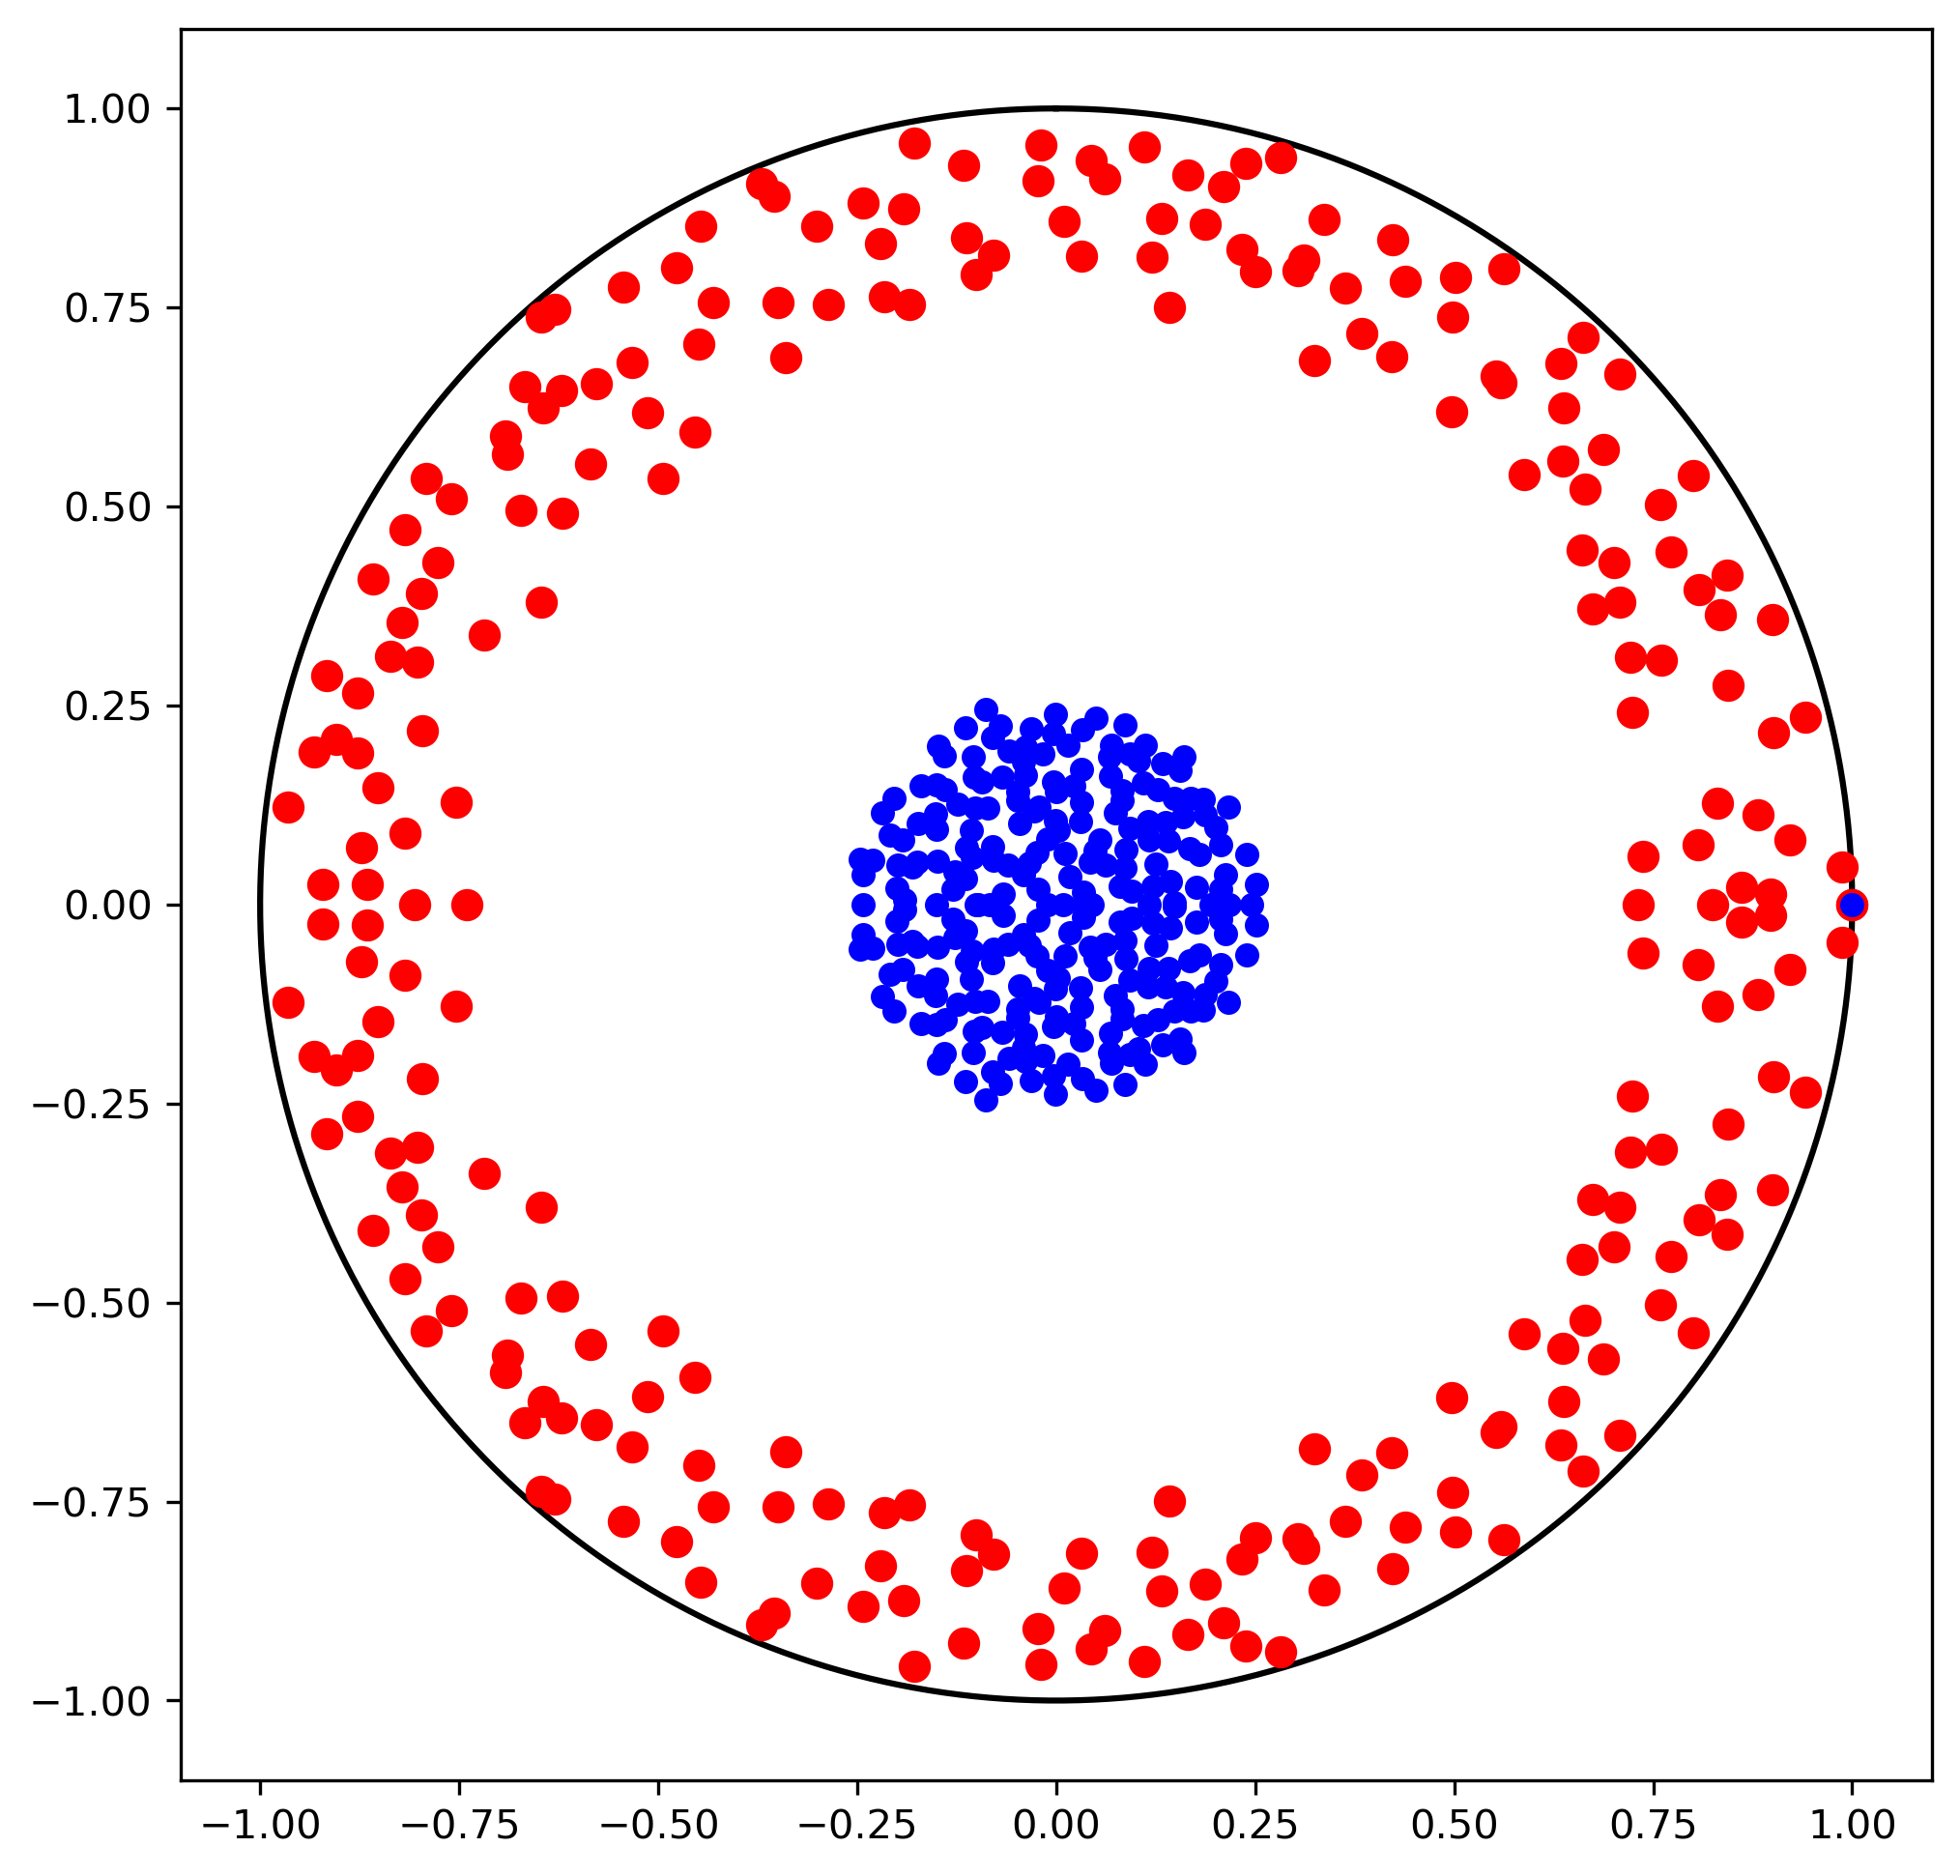

In [10]:
t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k-")

plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)
fig.savefig(f"spectrum_retry_fig0.png")

for i in tqdm(range(1, 200)):
    model.train(inputs = [spectrum_target],
                targets = [],
                num_iter = 20,
                N = 0)

    spectrum_model = channel_spectrum(kraus_model)
    
    fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    plt.plot(*circle, "k-")
    plt.plot(spectrum_target[:,0], spectrum_target[:,1], "ro", markersize = 7)
    plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo", markersize = 5)
    fig.savefig(f"spectrum_retry_fig{i}.png")
    plt.close(fig)

In [11]:
from src import *
from PIL import Image
import glob

frames = []
imgs = glob.glob("*.png")
imgs = sorted(imgs, key=lambda name: int(name[18:-4]))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    
frames[0].save('png_to_gif_retry.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1, loop=0)